In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitue and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates= list(lat_lngs)

In [4]:
#use the citypy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list ot hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list. 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >50):
        set_count += 1
        record_count = 1
        
    # create endpoint URL with each city. 
    city_url = url + "&q=" + city.replace(" ","+") 
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    
                         
                
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | mangai
Processing Record 3 of Set 1 | paso de los toros
Processing Record 4 of Set 1 | zhigansk
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | pasighat
Processing Record 11 of Set 1 | lagoa
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | kibala
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | trat
Processing Record 19 of Set 1 | lakes entrance
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | umea
Processing Record 23 of Set 1 | rik

Processing Record 38 of Set 3 | gat
Processing Record 39 of Set 3 | darnah
Processing Record 40 of Set 3 | caravelas
Processing Record 41 of Set 3 | manavgat
Processing Record 42 of Set 3 | touros
Processing Record 43 of Set 3 | thunder bay
Processing Record 44 of Set 3 | carmen
Processing Record 45 of Set 3 | maningrida
Processing Record 46 of Set 3 | pitimbu
Processing Record 47 of Set 3 | otyniya
Processing Record 48 of Set 3 | bodinayakkanur
Processing Record 49 of Set 3 | sinnamary
Processing Record 50 of Set 3 | dali
Processing Record 1 of Set 4 | bulolo
Processing Record 2 of Set 4 | san martin
Processing Record 3 of Set 4 | constitucion
Processing Record 4 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 5 of Set 4 | nelson bay
Processing Record 6 of Set 4 | merrill
Processing Record 7 of Set 4 | manggar
Processing Record 8 of Set 4 | caibarien
Processing Record 9 of Set 4 | la ronge
Processing Record 10 of Set 4 | amethi
Processing Record 11 of Set 4 | ancud


City not found. Skipping...
Processing Record 29 of Set 7 | carlsbad
Processing Record 30 of Set 7 | bandar
Processing Record 31 of Set 7 | atar
Processing Record 32 of Set 7 | marystown
Processing Record 33 of Set 7 | mogzon
Processing Record 34 of Set 7 | yongan
Processing Record 35 of Set 7 | korla
Processing Record 36 of Set 7 | ugoofaaru
Processing Record 37 of Set 7 | altamira
Processing Record 38 of Set 7 | ahmadpur east
Processing Record 39 of Set 7 | fernie
Processing Record 40 of Set 7 | wewak
Processing Record 41 of Set 7 | hernani
Processing Record 42 of Set 7 | sajanan
Processing Record 43 of Set 7 | camacha
Processing Record 44 of Set 7 | brea
Processing Record 45 of Set 7 | vestmanna
Processing Record 46 of Set 7 | trairi
Processing Record 47 of Set 7 | novo aripuana
Processing Record 48 of Set 7 | kapit
Processing Record 49 of Set 7 | tiznit
Processing Record 50 of Set 7 | marcona
City not found. Skipping...
Processing Record 1 of Set 8 | vzmorye
Processing Record 2 of 

Processing Record 17 of Set 11 | dzilam gonzalez
Processing Record 18 of Set 11 | nowy dwor mazowiecki
Processing Record 19 of Set 11 | yinchuan
Processing Record 20 of Set 11 | chapais
Processing Record 21 of Set 11 | marsh harbour
Processing Record 22 of Set 11 | dudinka
Processing Record 23 of Set 11 | winneba
Processing Record 24 of Set 11 | soyo
Processing Record 25 of Set 11 | san cristobal
Processing Record 26 of Set 11 | dosso
Processing Record 27 of Set 11 | cutro
Processing Record 28 of Set 11 | norman wells
Processing Record 29 of Set 11 | dawson
Processing Record 30 of Set 11 | mgandu
Processing Record 31 of Set 11 | latung
Processing Record 32 of Set 11 | ilorin
Processing Record 33 of Set 11 | grants pass
Processing Record 34 of Set 11 | mandalgovi
Processing Record 35 of Set 11 | tobermory
Processing Record 36 of Set 11 | hay river
Processing Record 37 of Set 11 | portland
Processing Record 38 of Set 11 | lufilufi
Processing Record 39 of Set 11 | altagracia de orituco
Pr

In [15]:
len(city_data)

558

In [17]:
# Convert the array of dictionaries to a PANDAS DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,55.17,82,73,7.27,CL,2021-10-20 22:04:52
1,Mangai,-4.0500,19.5333,69.40,99,100,1.50,CD,2021-10-20 22:05:16
2,Paso De Los Toros,-32.8167,-56.5167,63.97,70,68,11.92,UY,2021-10-20 22:05:16
3,Zhigansk,66.7697,123.3711,17.53,93,82,7.74,RU,2021-10-20 22:05:17
4,Busselton,-33.6500,115.3333,53.10,73,98,15.73,AU,2021-10-20 22:03:40
5,Hermanus,-34.4187,19.2345,63.90,88,83,7.61,ZA,2021-10-20 22:05:17
6,Severo-Kurilsk,50.6789,156.1250,35.60,65,83,23.55,RU,2021-10-20 22:04:49
7,Bredasdorp,-34.5322,20.0403,62.28,98,84,5.14,ZA,2021-10-20 22:03:49
8,Bluff,-46.6000,168.3333,48.42,55,100,3.65,NZ,2021-10-20 22:05:17
9,Pasighat,28.0667,95.3333,73.17,99,100,2.39,IN,2021-10-20 22:05:18


In [22]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humididty, Cloudines and Wind Speed so they are easy to read

#assign a variable to an array of the columns in the order we want them to appear
#new_column_order = ["column1", "column8", "colcolumn2", "column3", "column4", "column5", "column6", "column7"]
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
# Then, assign a new or same DataFrame with new column order: 
#city_data_df = city_data_df[new_column_order]


In [23]:
# Then, assign a new or same DataFrame with new column order: 
city_data_df = city_data_df[new_column_order]

In [24]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2021-10-20 22:04:52,-37.6167,-73.6500,55.17,82,73,7.27
1,Mangai,CD,2021-10-20 22:05:16,-4.0500,19.5333,69.40,99,100,1.50
2,Paso De Los Toros,UY,2021-10-20 22:05:16,-32.8167,-56.5167,63.97,70,68,11.92
3,Zhigansk,RU,2021-10-20 22:05:17,66.7697,123.3711,17.53,93,82,7.74
4,Busselton,AU,2021-10-20 22:03:40,-33.6500,115.3333,53.10,73,98,15.73
5,Hermanus,ZA,2021-10-20 22:05:17,-34.4187,19.2345,63.90,88,83,7.61
6,Severo-Kurilsk,RU,2021-10-20 22:04:49,50.6789,156.1250,35.60,65,83,23.55
7,Bredasdorp,ZA,2021-10-20 22:03:49,-34.5322,20.0403,62.28,98,84,5.14
8,Bluff,NZ,2021-10-20 22:05:17,-46.6000,168.3333,48.42,55,100,3.65
9,Pasighat,IN,2021-10-20 22:05:18,28.0667,95.3333,73.17,99,100,2.39


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

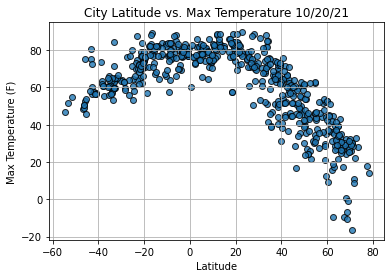

In [28]:
# Import time module
import time

# Build a scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

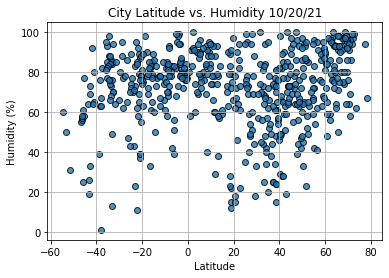

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

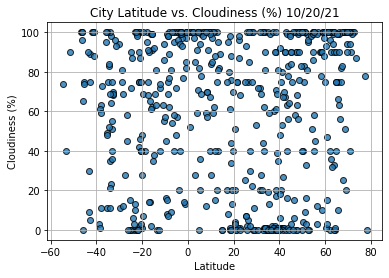

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

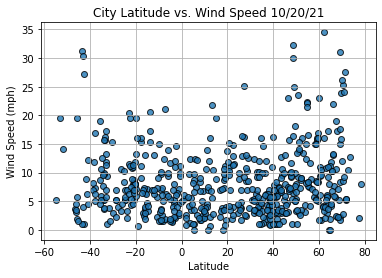

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()